If you don't see `Python 3.6.12 :: Anaconda, Inc.` in Windows 10, you might be in touble later, because in my case `pymc3` worked only for Anaconda python 3.6.x.

In [1]:
!python --version

Python 3.6.12 :: Anaconda, Inc.


In [102]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

There are other python libraries for random sampling instead of `scipy.stats`.
1. `numpyro`
2. `pytorch.distributions`
3. `tensorflow.distributions`
Since `scipy.stats` has been existed and used for long time and frequently found in other text books, we will use it.

## binomial distribution
- you have a weired coin. It shows you H more frequently than T. The ratio of showing H is $p$, could be fixed, but we don't know. The ratio of T is $1-p$, $0\leq p \leq 1$
- You tossed the weired cone $n$ times.
- You may observe H, 0 times, once, twice, 3 times, ..., $n$ times, and no more.

- Let's consider when $p=0.7$

In [13]:
p = .7
n = 10
x = np.arange(n+1)  # [0, ... , 10]
distr = stats.binom(n=n, p=p)

Let's generate 10,000 samples from this distribution. In other words, let's toss the coin 10 times and record the number of H's, and repeat it 10,000 times.

In [16]:
samples = distr.rvs(10000)
samples[:11]

array([ 7,  6,  5,  7,  7,  7, 10,  7,  7,  3,  8])

In [38]:
counts = np.zeros(n+1, dtype=np.double)
for s in samples:
    counts[s] += 1
counts /= len(samples)
counts

array([0.000e+00, 1.000e-04, 1.700e-03, 7.800e-03, 3.710e-02, 1.095e-01,
       1.929e-01, 2.685e-01, 2.332e-01, 1.227e-01, 2.650e-02])

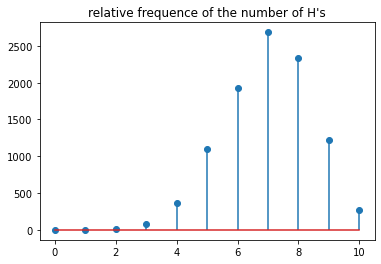

In [40]:
plt.stem(counts);
plt.title('relative frequence of the number of H\'s');

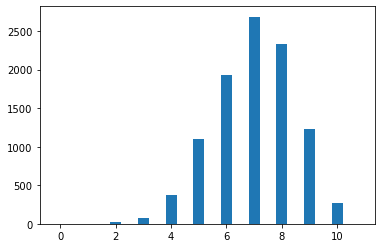

In [52]:
# the relative frequency can be computed with histogram
plt.hist(samples, width=.4, bins=np.arange(12)-.2);

- Why do we use `np.arange(12) - .2`?

Probability Mass Function (PMF) is a more scitific name of the Relative frequency.

In [54]:
pmf = distr.pmf(x)
pmf

array([5.90490000e-06, 1.37781000e-04, 1.44670050e-03, 9.00169200e-03,
       3.67569090e-02, 1.02919345e-01, 2.00120949e-01, 2.66827932e-01,
       2.33474440e-01, 1.21060821e-01, 2.82475249e-02])

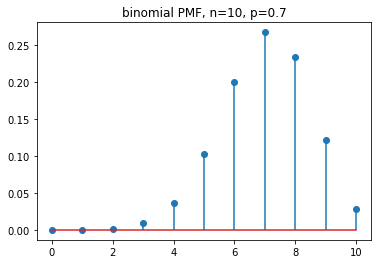

In [55]:
plt.stem(x, pmf);
plt.title(f'binomial PMF, n=10, p=0.7');

Cumulative Distribution Function CDF

$$
    \mathrm{CDF}(x_0) = Pr[X \leq x_0] = \sum_{i=0}^{i_{x_0}} \mathrm{pmf}(i)
$$

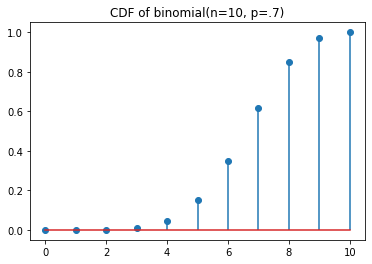

In [61]:
plt.stem(distr.cdf(x));
plt.title('CDF of binomial(n=10, p=.7)');

# Binomial with $n=1$ is Bernoulli

In [63]:
distr = stats.bernoulli(p=.7)

In [64]:
distr.rvs(20)

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

It is equivalent to tossing a coin 20 times.

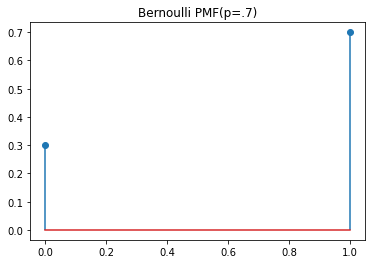

In [67]:
plt.stem(distr.pmf([0,1]));
plt.title(f'Bernoulli PMF(p=.7)');

# Multnomial is when $dim(p)>1$

- The multinomial distribution for $dim(p)=2$ is identical to the corresponding binomial distribution.
- You have a machine, weird again, of showing one of three things when you touch it.
- The three things are represented by [0, 1, 2], or [A, B, C], or whatever you like.
- The relative frequency of the three things is now given as a vector $p=[p_1, p_2, p_3]$. Let's say  $ p = [.6, .3, .1]$, for example; $Pr[X=A] = .6$ and so on.

$$
    \sum_i p_i = 1 \quad\mbox{and}\quad p_i \geq 0 \;\forall i
$$

- Now you touch the machine $n$ times, and count the number of A's, B's and C's. This vector $[c_A, c_B, c_C]$ of three count numbers is a random vector governed by the probability $p$ and the number of repitition $n$.

See [docs.scipy.org about multinomial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multinomial.html).

In [76]:
p = [.6, .3, .1]
n = 10
distr = stats.multinomial(n=n, p=p)

In [77]:
distr.rvs(5)

array([[4, 3, 3],
       [5, 3, 2],
       [4, 3, 3],
       [6, 4, 0],
       [5, 5, 0]])

In [79]:
stats.multinomial(n=100, p=p).rvs(5)

array([[65, 27,  8],
       [54, 37,  9],
       [65, 28,  7],
       [60, 32,  8],
       [59, 28, 13]])

# Categorical is Multinomial(n=1)

In [143]:
p = np.random.uniform(size=8)
p /= sum(p)
cat = stats.multinomial(n=1, p=p)
p, p.sum()

(array([0.26058206, 0.26013264, 0.04235984, 0.10541002, 0.0925949 ,
        0.08869173, 0.12366723, 0.02656157]),
 1.0)

In [150]:
sample = cat.rvs(4)
sample, np.argmax(sample, axis=1)

(array([[0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 0]]),
 array([1, 4, 6, 6], dtype=int64))

In [152]:
# another example
p2 = np.random.rand(5)
p2 /= sum(p2)
print('p2', p2)

stats.multinomial(n=1, p=p2).rvs(4)

p2 [0.04183469 0.39094389 0.14219791 0.31218562 0.11283789]


array([[0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

---
# Now Continuous Random Variables
- Random Variables can take any value along a continuous interval
- PDF instead of PMF
- The shape of PDF is controlled by parameters.
    - Normal PDF: mean and std
    - Beta: a, b
    
---

# Beta(a,b)

- Probability density function on a continuous domain $[0,1]$.
- The shape of the function is determined by the two paramers $a$ and $b$.
- Very useful when we want to consider a probability $p$ since the distribution is confined in the interval $[0,1]$.

**check**
- It is not a PMF since the domain is continus; the domain is bounded but there are infinitly many numbers in $[0,1]$.
- The value of the density may be larger than 1, because it is not PMF.

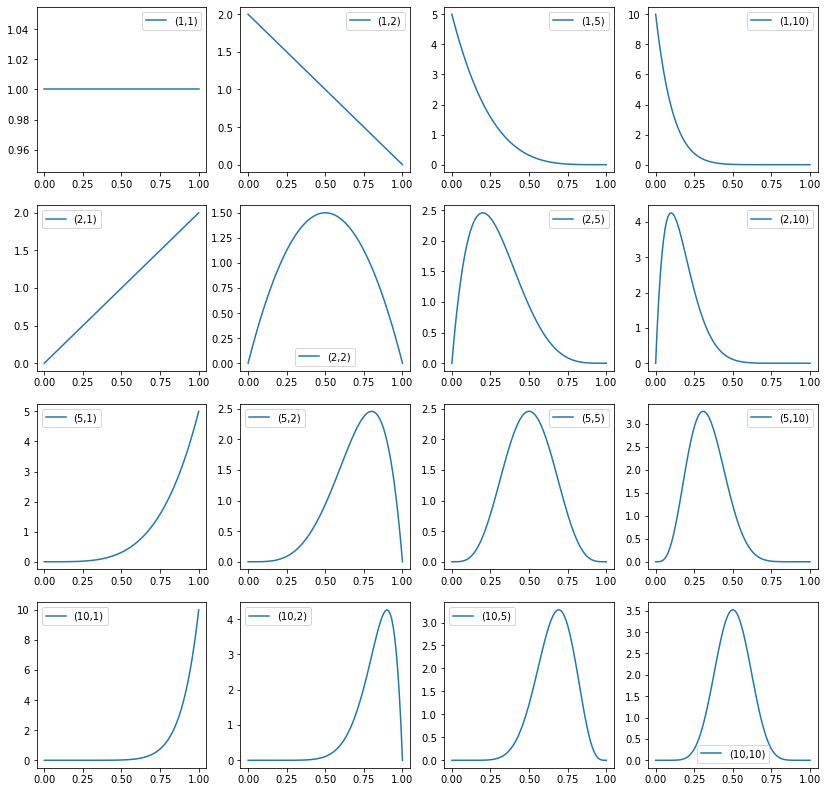

In [93]:
x = np.linspace(0, 1, 100)

fig, axes = plt.subplots(4, 4, figsize=(14,14))
for i, a in enumerate([1, 2, 5, 10]):
    for j, b in enumerate([1, 2, 5, 10]):
        axes[i][j].plot(x, stats.beta(a,b).pdf(x), label=f'({a},{b})')
        axes[i][j].legend()

Still we can generate samples as many as you like.

In [94]:
stats.beta(1,1).rvs(20)

array([0.92367131, 0.57508691, 0.05049955, 0.22478214, 0.80200109,
       0.24756612, 0.17435667, 0.54365742, 0.07146202, 0.30319513,
       0.99264705, 0.99497496, 0.41621916, 0.27291778, 0.24102146,
       0.37259148, 0.24825199, 0.65002594, 0.90172802, 0.28162427])

In [109]:
samples = stats.beta(1,1).rvs(10000)
samples[:10]

array([0.47981488, 0.12989424, 0.31423116, 0.1675807 , 0.61043029,
       0.95591528, 0.36884584, 0.4009352 , 0.34625925, 0.7500841 ])

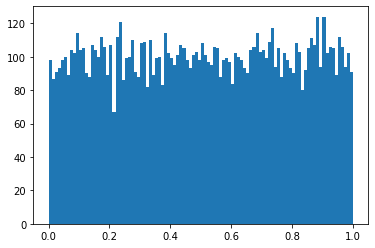

In [110]:
plt.hist(samples, bins=100);

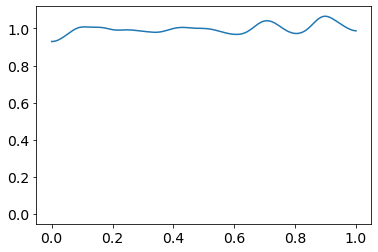

In [111]:
az.plot_kde(samples);

Q. Try more samples until you get a similar histogram of kde plot.

Another example with $a=1$, $b=10$.

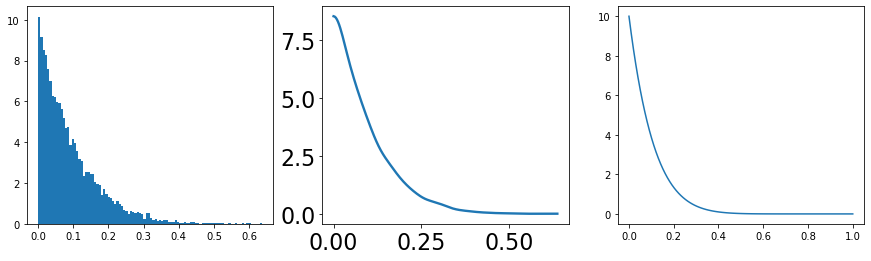

In [119]:
a, b = 1, 10
fig, axes = plt.subplots(1,3, figsize=(15,4))
samples = stats.beta(a, b).rvs(10000)
axes[0].hist(samples, bins=100, density=True); # histogram
az.plot_kde(samples, ax=axes[1]);              # kde
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta(a,b).pdf(x));           # pdf from mathematical formula

Q. What is the mathematical formula of the beta pdf?

# Normal
- In statistics, almost every thing can be normal.
- Especially, when you compute an average of some rv, the the average is normal (roughly speaking).
- Two parameters: mean, std
- The value of the probability (density) at $x$ given $\mu_x$, $\sigma_x$ is the same as the probability at $$y=(x-\mu_x)/\sigma_x$$ with $\mu_y=0$, $\sigma_y=1$.
- The spread of pdf is determined by $\sigma$.

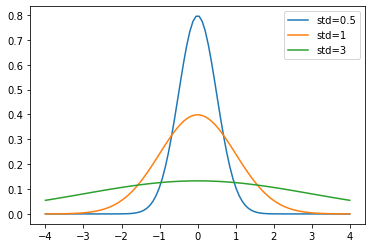

In [124]:
x = np.linspace(-4, 4, 100)
for std in [0.5, 1, 3]:
    plt.plot(x, stats.norm(0, std).pdf(x), label=f'std={std}')
plt.legend()

# Student's t

- Parameters: $\nu$, loc, scale
    - $\nu$ is  called the **degree of freedom**
    - The pdf at $x$ given $\nu_x$, $\mu_x$, $s_x$, is identically equivalent to $$ \mbox{t.pdf}(y,\nu_x) / s_x $$ with $$ y = (x - \mu_x) / s_x $$
    - Converges to normal(0,1) when $\nu$ is very large ($\nu\rightarrow\infty$). 

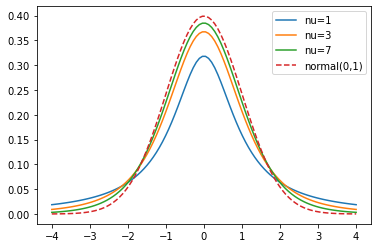

In [136]:
x = np.linspace(-4, 4, 100)
for nu in [1, 3, 7]:
    plt.plot(x, stats.t(nu, loc=0, scale=1).pdf(x), label=f'nu={nu}')
plt.plot(x, stats.norm(loc=0, scale=1).pdf(x), '--', label=f'normal(0,1)')
plt.legend();

End.